In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Si scriva una funzione che simuli il cammino degli abitanti del villaggio dopo aver bevuto la grappa,
assumendo che si spostino in piano, che ogni passo abbia direzione casuale uniforme angolarmente
ed una lunghezza distribuita secondo una distribuzione Gaussiana con media 1 e larghezza 0.2,
troncata a valori positivi.

In [2]:
def rand_range (xmin, xmax) :
    return xmin + (xmax - xmin) * random.random ()


def rand_TAC_gauss (mu, sigma) :
    y_max = 1.
    if (mu - 3. * sigma) < 0 :
        x_sx = 0
    else :
        x_sx = mu - 3. * sigma
    x = rand_range (x_sx, mu + 3. * sigma)
    y = rand_range (0., y_max)
    while (y > np.exp (-0.5 * ( ((x - mu) / sigma)**2)) ) :
        x = rand_range (x_sx, mu + 3. * sigma)
        y = rand_range (0., y_max)
    return x


def rand_walk (mean, sigma, N_passi) :
    x_coord = [0.]
    y_coord = [0.]
    for i in range (N_passi) :
        theta = rand_range (0., 2*np.pi)
        ro = rand_TAC_gauss (mean, sigma)
        x = x_coord[-1] + ro*np.cos (theta)
        y = y_coord[-1] + ro*np.sin (theta)
        x_coord.append (x)
        y_coord.append (y)
    return x_coord, y_coord


def calcola_distanza (x_0, x_n, y_0, y_n) :
    return np.sqrt ((x_n - x_0)**2 + (y_n - y_0)**2)

Immaginando che il calderone si trovi alle coordinate $(0, 0)$ sul piano, si scriva una funzione che
calcoli la posizione (x, y) raggiunta da Asterix dopo $N = 10$ passi e si disegni il suo percorso.

La distanza dal punto di partenza (0, 0) al punto (x, y) = ( 2.8123212465617384 , 1.3603331393520075 ) è: 
 3.124044981091319 



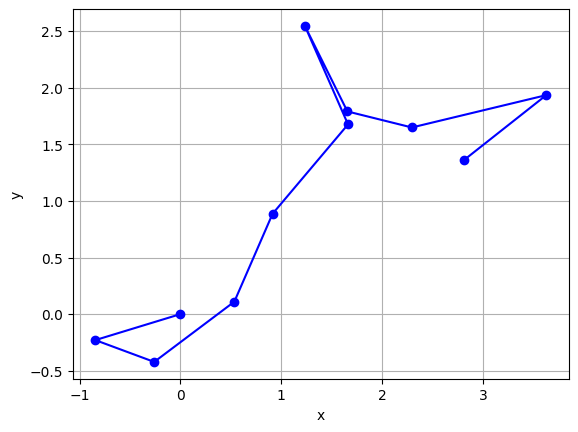

In [3]:
# Punto 1 e 2
mean = 1.
sigma = 0.2
N_passi = 10
coord_x, coord_y = rand_walk (mean, sigma, N_passi)

#print ("\n", coord_x, "\n")
#print (coord_y)

# calcolo la distanza tra il punto (x, y) = (0, 0) ed il punto raggiunto
coord_x_array = np.array (coord_x)
coord_y_array = np.array (coord_y)

distanza = calcola_distanza (0., coord_x_array[10], 0., coord_y_array[10])    
print ("La distanza dal punto di partenza (0, 0) al punto", "(x, y) = (", coord_x_array[10], ",", coord_y_array[10], ") è: \n", distanza, "\n")

# Grafico
fig, ax = plt.subplots ()
ax.plot (coord_x, coord_y, "o-", color = "blue")
ax.set_xlabel ("x")
ax.set_ylabel ("y")
ax.grid ()

plt.show ()

Si consideri ora l’intera popolazione: si determini la posizione $(x, y)$ di ogni abitante dopo $N =
10$ passi a partire dal calderone e si disegni le distribuzione della distanza raggiunta dal punto di
partenza, assumendo la popolazione totale composta da 10000 persone.

In [4]:
N_persone = 10000
lista_distanze = []
for i in range (N_persone) :
    coord_x, coord_y = rand_walk (mean, sigma, N_passi)
    distanza = calcola_distanza (0., coord_x[10], 0., coord_y[10])    
    lista_distanze.append (distanza)
    
#print (lista_distanze)

def sturges (N_eventi) :
    return int (np.ceil (1 + np.log2 (N_eventi)))

Nbin = sturges (len(lista_distanze))
bin_content, bin_edges = np.histogram (lista_distanze, bins=Nbin, range = (min (lista_distanze), max(lista_distanze)))

Si determinino media, varianza, asimmetria e curtosi della distribuzione ottenuta

In [5]:
# Media con array
def media (sample) :
    mean = np.sum(sample)/len(sample)
    return mean

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

# Varianza con corr. di Bessel con array
def varianza (sample) :
    somma_quadrata = 0
    somma_quadrata = np.sum( (sample - media(sample))**2 )
    var = somma_quadrata/(len(sample) - 1)
    return var

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

# Deviaz. standard con array
def dev_std (sample) :
    sigma = np.sqrt (varianza(sample))
    return sigma

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

# Deviaz. standard della media con array
def dev_std_media (sample) :
    return dev_std(sample) / (np.sqrt( len(sample) ))

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

# Skewness con array
def skewness (sample) :
    mean = media (sample)  # Calcola la media con la tua funzione
    sigma = dev_std (sample)  # Calcola la deviazione standard con la tua funzione
    n = len(sample)
    skew = np.sum((sample - mean)**3) / (n * sigma**3)
    return skew

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

# Curtosi con array
def kurtosis (sample) :
    mean = media (sample)  # Calcola la media con la tua funzione
    variance = varianza (sample)  # Calcola la varianza con la tua funzione
    n = len(sample)
    kurt = np.sum((sample - mean)**4) / (n * variance**2) - 3
    return kurt

In [6]:
print ('\nMedia della distribuzione: ', media (lista_distanze))
print ('\nVarianza della distribuzione: ', varianza (lista_distanze))
print ('\nAsimmetria della distribuzione: ', skewness (lista_distanze))
print ('\nCurtosi della distribuzione: ', kurtosis (lista_distanze))


Media della distribuzione:  2.8785141453812866

Varianza della distribuzione:  2.1511670430364136

Asimmetria della distribuzione:  0.523197176811083

Curtosi della distribuzione:  -0.03804580999332341


Se la lunghezza dei passi è costante uguale ad 1, la distribuzione delle distanze r dopo N passi segue una distribuzione di Rayleigh:
$f(r) = \frac{2r}{N} e^{\frac{r^2}{N}}$.
Si utilizzi un fit per determinare, a partire dalla distribuzione di distanze costruita in queste ipotesi, il numero di passi effettuati, sapendo che la distribuzione di Rayleigh è presente in scipy come scipy.stats.rayleigh e che per ottenere la forma funzionale di interesse per il problema questa distribuzione ha come parametri $loc = 0$ e $scale = N/2$ (dove N è il numero di passi).